# IFT 6758 - Devoir 3 

### Pt 2. Classement d'éches
**Comparaison des groupes sur/sous-représentés**

Evaluation de ce notebook :

- Graphiques pour les distributions de scores et d'écarts
- Résultats imprimés des tests de permutation
- Réponses courtes (dernière section)


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import chess_rating

/Users/canelle/Documents/Automne_2023/Science_données/devoir3/chess_rating.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## 1. Chargez les données

### 1.1 Lire les données XML

In [4]:
xml_path = Path("data/standard_oct22frl_xml.xml")  # shouldn't need to change this

In [5]:
# TODO: Complétez cette méthode dans chess_ratings.py
raw_df = chess_rating.parse_xml(xml_path)

In [7]:
import random

In [8]:
# Vérifiez pour voir un échantillon de 5 joueurs
random.seed(0)
raw_df.sample(5)

,name,rating,sex,birthday,country,flag,title
87914,"Doerge, Sven",1943,M,1974,GER,None,None
255077,"Ocampos Mereles, Martin Alfredo",1377,M,1980,PAR,None,None
356946,"Thurillet, Vincent",2133,M,1985,FRA,None,None
279503,"Poranen, Niko",1669,M,1999,FIN,i,None
362767,"Tryjanska, Kornelia",1403,F,2000,POL,w,None


In [9]:
# Vérifiez pour voir les dtypes du dataframe brut
raw_df.dtypes

name        object
rating      object
sex         object
birthday    object
country     object
flag        object
title       object
dtype: object

In [10]:
# Voir il y a combien de dates de naissance manquantes
raw_df.birthday.isnull().sum()

8477

### 1.2 Nettoyez les données

Nous voulons que les anniversaires (année de naissance) et le score (Elo) soient convertis en nombres entiers afin que nous puissions faire des opérations numériques/logiques avec eux (par exemple, moins que, plus grand que, etc.). Complétez la méthode `clean_data()` dans `chess_rating.py`

In [12]:
# TODO: Complétez cette méthode dans chess_ratings.py
df = chess_rating.clean_data(raw_df, 2002)

/Users/canelle/Documents/Automne_2023/Science_données/devoir3/chess_rating.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """ Renvoie un DataFrame avec les `ratings` regroupés entre les valeurs données dans `bins`, et
/Users/canelle/Documents/Automne_2023/Science_données/devoir3/chess_rating.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avec une étiquette donnée par `bin_centers`. En plus du nombre brut, ajoutez également une colonne normalisée nommée "count_norm" obtenu en divisant les comptes

In [13]:
np.random.seed(0)
df.sample(5)

,name,rating,sex,birthday,country,flag,title
206801,"Lutzen, Mads",1542,M,2000,DEN,i,None
296314,"Rieckers, Dirk",1397,M,1964,GER,i,None
120235,"Gil, Celsio",1752,M,1999,STP,i,None
147860,"Hurwitz, Ed J G",2023,M,1964,ENG,i,None
124743,"Gonzalez Gomez, Pedro Daniel",1539,M,1997,ESP,None,None


In [14]:
df.dtypes

name        object
rating       int64
sex         object
birthday     int64
country     object
flag        object
title       object
dtype: object

In [15]:
df.birthday.isnull().sum()

0

## 2. Histogrammes des scores Elo

Nous voulons d'abord comparer la distribution des scores pour les joueurs masculins et féminins.
Étant donné que les données sont assez fines, nous devrons regrouper les notes.
Complétez `bin_counts()`, qui devrait gérer le binning pour les données arbitraires et le choix des bacs.
En plus de renvoyer les décomptes bruts, renvoyez également les décomptes normalisés dans la trame de données (`"count_norm"`).

### 2.1 Binning data

Voici quelques entrées de test pour vous aider à valider votre implémentation :

In [16]:
# sample inputs to help test your method
x = pd.DataFrame({'rating': [1, 2, 4, 6, 6, 7, 8, 11] })
bins = [0, 5, 10, 15]
bin_centers = [2.5, 7.5, 12.5]

# Output attendu
solution = pd.DataFrame({
    'rating': {0: 7.5, 1: 2.5, 2: 12.5},
     'count': {0: 4, 1: 3, 2: 1},
     'count_norm': {0: 0.5, 1: 0.375, 2: 0.125}
})

In [17]:
binned_output = chess_rating.bin_counts(x, bins, bin_centers)
binned_output

In [18]:
solution.eq(binned_output)

,rating,count,count_norm
0,False,False,False
1,False,False,False
2,False,False,False


Utilisons cette méthode pour bin les scores M/F et les comparer.

In [23]:
# TODO: Spécifiez les bin counts 
# le min de rating est de 1001
# le max de rating est de 2856
# je pense que faire des bins de 200 semble correct, ça donne 10 bins
bins = [1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800]
bin_centers = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]

In [40]:
# Générez les données d'histogramme  
# TODO: completez chess_rating.bin_counts()
M_hist = chess_rating.bin_counts(df.query("sex=='M'"), bins=bins, bin_centers=bin_centers)
F_hist = chess_rating.bin_counts(df.query("sex=='F'"), bins=bins, bin_centers=bin_centers)

M_hist['sex'] = 'M'
F_hist['sex'] = 'F'

hist = pd.concat([M_hist, F_hist])

/Users/canelle/Documents/Automne_2023/Science_données/devoir3/chess_rating.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/canelle/Documents/Automne_2023/Science_données/devoir3/chess_rating.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


À l'aide des données regroupées, tracez deux graphiques linéaires des données regroupées côte à côte; l'un contenant les décomptes bruts (`"count"`), et l'autre contenant les décomptes normalisés (`"count_norm"`), et M/F doit être de deux couleurs différentes.

In [49]:
hist

,rating,count,count_norm,sex
0,1100.0,15412,0.056184,M
1,1300.0,32841,0.119722,M
2,1500.0,49364,0.179956,M
3,1700.0,60369,0.220075,M
4,1900.0,57344,0.209047,M
5,2100.0,41072,0.149728,M
6,2300.0,15123,0.055131,M
7,2500.0,2551,0.009300,M
8,2700.0,235,0.000857,M
0,1100.0,2755,0.112919,F


<Axes: xlabel='rating', ylabel='count_norm'>

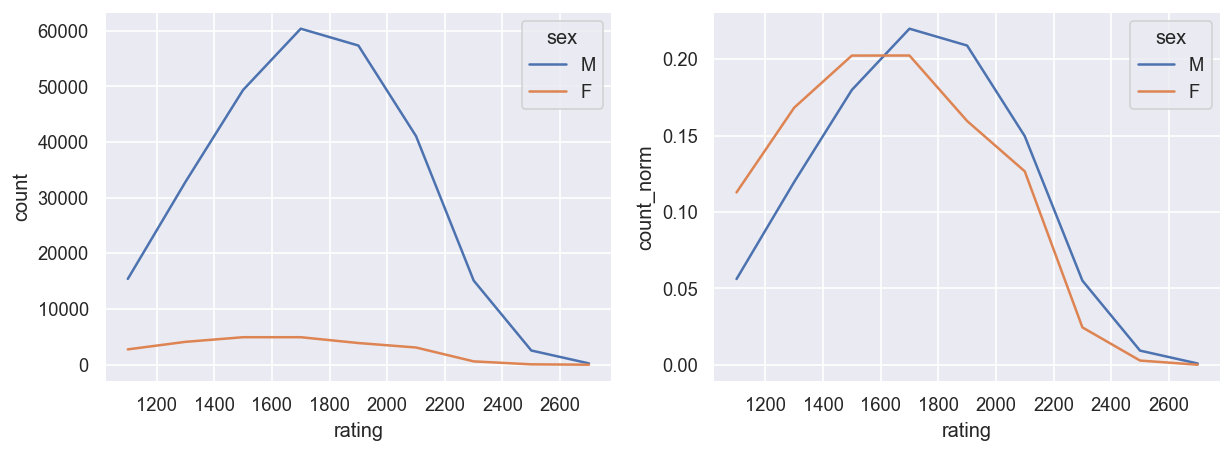

In [41]:
# Now draw the two histograms side-by-side. 
fig, ax = plt.subplots(1,2, figsize=(12, 4), dpi=120)
sns.lineplot(data=hist, x="rating", y="count", hue='sex', ax=ax[0])
sns.lineplot(data=hist, x="rating", y="count_norm", hue='sex', ax=ax[1])

## 3. Tests de Permutation

Nous allons maintenant effectuer les tests de permutation comme indiqué dans l'expérience de pensée de l'introduction.
Prenez l'ensemble de données nettoyé complet (hommes et femmes) et échantillonnez au hasard deux groupes sans remplacement (c'est-à-dire mélangez les joueurs).
La taille des groupes doit refléter la différence du monde réel que nous souhaitons étudier, c'est-à-dire la taille du groupe masculin et féminin.
Terminez `chess_rating.PermutationTests.job()`, qui implémente la partie échantillonnage de cette expérience, et renvoie la valeur maximale des groupes surreprésentés et sous-représentés respectivement.

Ensuite, complétez la méthode `chess_rating.sample_two_groups()`, qui exécute cette expérience `n_iter` fois.
Une fois terminé, exécutez cette expérience dans le bloc-notes avec au moins `n_iter=1000`.
Exécutez la cellule qui imprime la différence moyenne obtenue à partir des tests de permutation, ainsi que les différences réelles.

In [45]:
nb_M = df[df['sex'] == 'M']['sex'].count() 
nb_F = df[df['sex'] == 'F']['sex'].count()

proportion = 0.1 # C'est arbitraire mais je vais prendre 10% du df initial

n_overrep = int(max(nb_M*proportion, nb_F*proportion)) # TODO
n_underrep =  int(min(nb_M*proportion, nb_F*proportion)) # TODO

#n_overrep = max(nb_M, nb_F) # TODO
#n_underrep =  min(nb_M, nb_F) # TODO


over, under = chess_rating.sample_two_groups(df, n_overrep, n_underrep, n_iter=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [46]:
diffs = over - under
max_M, max_F = df.query("sex=='M'").rating.max(), df.query("sex=='F'").rating.max()

In [47]:
print(f"Mean difference between top individuals in the over/under represented groups taken from the permutation experiments:")
print(f"\n\t{diffs.mean()} (std={diffs.std().round(2)})")
print()
print("Real values:\n")
print(f"\tMax M:\t\t{max_M}")
print(f"\tMax F:\t\t{max_F}")
print(f"\tReal difference: {max_M - max_F}")

Mean difference between top individuals in the over/under represented groups taken from the permutation experiments:

	108.955 (std=76.52)

Real values:

	Max M:		2856
	Max F:		2675
	Real difference: 181


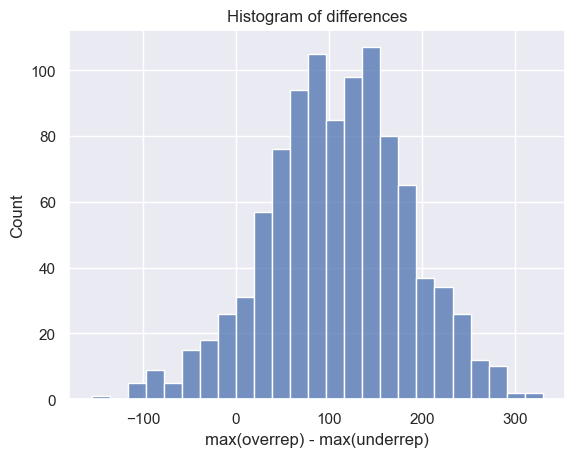

In [48]:
fig, ax = plt.subplots(1, 1, dpi=100)
sns.histplot(diffs, ax=ax).set(title="Histogram of differences", xlabel="max(overrep) - max(underrep)");

# Questions 

Donnez des réponses courtes aux questions suivantes (1-3 lignes chaques).

1. Interprétez les résultats - pouvez-vous tirer une conclusion ? Rappelez-vous que l'affirmation discutée dans l'introduction de cette question était "les hommes sont meilleurs que les femmes aux échecs parce que la plupart des meilleurs joueurs sont des hommes". (Remarque : probablement une partie de votre réponse ici sera liée à votre réponse à la question suivante.)

*Le centre de l'histogramme ne se trouve pas proche de zéro, donc il semble y avoir une différence significative entre les scores Elo des hommes et des femmes lorsque le biais de la taille de l'échantillon est contrôlé. Mais on ne peut toujours pas conclure, il y a d'autres biais qui peuvent rentrer en jeu.*
 

2. Pensez-vous que les chiffres obtenus ici racontent toute l'histoire ? Quels pourraient être les problèmes avec l'analyse menée ici ? Les données avec lesquelles nous travaillons sont-elles biaisées d'une quelconque manière (autre qu'un biais de surreprésentation) ? L'ELO est-il une bonne mesure et peut-il être utilisé pour répondre à la question initiale ? Existe-t-il des différences dans le traitement social, culturel et systémique des hommes et des femmes qui peuvent empêcher le groupe sous-représenté d'obtenir des résultats similaires ? Rien d'autre?

*Les chiffres obtenus ne racontent pas toute l'histoire. L'analyse pourrait être limitée par le biais inhérent aux données et la capacité du système de notation Elo à refléter avec précision les compétences des joueurs. Des facteurs externes, tels que les différences dans les opportunités et le traitement des joueurs basés sur le genre, peuvent également influencer les résultats et doivent être pris en compte pour une compréhension complète. J'imagine que les femmes peuvent faire face à des stéréotypes de genre qui mettent en doute leurs compétences en échecs, une représentation moindre dans les médias et les publicités, et un accès limité à des opportunités de formation et de compétition de haut niveau.*



Le but de ces questions est de souligner que les données sont une représentation limitée du monde réel. Il est essentiel pour nous, en tant que scientifiques des données, de prendre du recul lorsque nous examinons un résultat et de réfléchir à la façon dont il est lié au monde réel, plutôt que de simplement supposer naïvement que les données et la configuration expérimentale sont bonnes, ce qui entraîne souvent des conclusions erronées/incorrectes. Il pourrait y avoir plusieurs facteurs de causalité qui expliquent une relation qui sont indépendants de l'hypothèse d'origine: utilisation de données qui ne reflètent pas vraiment l'hypothèse que vous souhaitez tester, données biaisées (y compris les groupes surreprésentés), différences systémiques réelles entre les groupes, etc.